In [11]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import sys
sys.path.append('../../')   # Add parent directory to Python path
from utils.Plots import *
RANDOM_SEED = 42


In [12]:
df = pd.read_csv('../../data/handlebar/processed_segments_overlap_20.csv') 
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,8.762772,8.753204,8.762772,8.781937,8.753204,8.748413,8.738831,8.748413,8.743622,...,8.786728,8.801086,8.820236,8.786728,8.777145,8.772354,8.781937,8.801086,8.781937,8.753204
1,0.0,8.757996,8.801086,8.815445,8.796295,8.791504,8.796295,8.805878,8.801086,8.801086,...,8.772354,8.757996,8.791504,8.781937,8.753204,8.777145,8.810669,8.767563,8.815445,8.781937
2,0.0,8.762772,8.767563,8.777145,8.777145,8.748413,8.762772,8.805878,8.781937,8.777145,...,8.777145,8.767563,8.772354,8.777145,8.796295,8.801086,8.805878,8.772354,8.796295,8.805878
3,0.0,8.805878,8.796295,8.781937,8.801086,8.810669,8.796295,8.805878,8.791504,8.791504,...,8.748413,8.777145,8.767563,8.757996,8.757996,8.757996,8.767563,8.791504,8.786728,8.786728
4,0.0,8.753204,8.777145,8.767563,8.762772,8.786728,8.734055,8.786728,8.753204,8.786728,...,8.762772,8.762772,8.781937,8.781937,8.805878,8.781937,8.762772,8.757996,8.762772,8.767563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,1.0,34.648895,23.879776,15.988480,6.268021,10.884048,19.613297,-0.957687,-21.456833,-36.889862,...,15.940598,18.382675,11.247955,3.294418,-5.956772,-6.038177,11.578354,21.950043,22.313965,7.627930
5820,1.0,35.601776,51.753067,54.276550,25.996246,-2.097321,-2.097321,-10.553635,-1.010361,7.383713,...,-0.019150,0.584183,-6.746857,-2.638412,9.390060,6.876144,15.078690,15.078690,7.762009,10.433929
5821,1.0,20.561401,15.883133,15.883133,11.774689,13.302185,10.544067,17.769760,16.610977,13.584702,...,60.429657,25.072083,9.495407,-14.068329,-19.512741,-11.065994,2.049438,2.049438,10.376465,13.273453
5822,1.0,-22.385788,-30.980972,-23.218964,-6.301544,14.973343,18.669983,26.542114,38.690308,48.295837,...,27.562057,17.372330,11.903976,2.710236,5.200211,11.745956,5.736511,10.702087,2.834732,2.078171


In [13]:
# Suppose df is your DataFrame, and df['curb_scene'] is your label column
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'], 
                                                                    test_size=0.2, 
                                                                    random_state=RANDOM_SEED)


In [ ]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit(train_data.iloc[:, 1:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 1:])
test_data_scaled = scaler.transform(test_data.iloc[:, 1:])



In [23]:
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[1:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[1:])
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
train_data_scaled_df.head()


,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,Acc-Z_10,...,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100,curb_scene
0,-1.292349,-1.413383,-0.865768,0.861620,2.237443,1.867200,-0.138699,-1.420708,-1.853424,-0.999532,...,-0.290532,-0.695047,0.265154,-1.114271,-0.630063,0.001351,1.410097,1.663488,-0.010922,0.0
1,-0.566530,0.940266,0.907407,0.903194,-0.504935,-0.348031,0.035411,1.016076,-1.665892,-1.997259,...,1.926692,0.939806,0.866528,-0.761206,-1.180753,-1.141454,-2.330392,-0.885422,-0.942968,1.0
2,-0.061578,-0.077279,-0.059848,-0.053777,-0.046199,-0.050972,-0.055789,-0.052186,-0.053610,-0.054573,...,-0.058487,-0.067871,-0.070930,-0.079835,-0.069375,-0.051041,-0.036795,-0.037158,-0.060022,0.0
3,-0.069194,-0.081099,-0.067352,-0.059715,-0.052059,-0.053354,-0.060311,-0.055958,-0.060916,-0.058632,...,-0.067872,-0.074871,-0.074999,-0.080634,-0.073541,-0.051860,-0.038404,-0.037982,-0.053132,0.0
4,0.561424,-0.763283,-0.747205,-0.149548,0.353940,-0.116896,-0.240452,-0.757572,-1.566038,-1.525592,...,0.353564,2.079568,0.842116,-1.210128,-2.416267,-1.107891,1.684010,1.111706,-0.172868,0.0


In [24]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]
# Example usage: Accessing the original index
print(normal_test_data_scaled.index)
print(abnormal_test_data_scaled.index)

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1154, 1155, 1156, 1157, 1158, 1160, 1161, 1162, 1163, 1164],
      dtype='int64', length=1123)
Index([  76,   83,   93,  107,  148,  192,  204,  218,  256,  283,  296,  312,
        380,  413,  417,  451,  459,  498,  501,  502,  512,  616,  682,  705,
        709,  713,  720,  726,  735,  808,  822,  927,  970, 1007, 1023, 1042,
       1055, 1072, 1084, 1150, 1151, 1159],
      dtype='int64')


In [25]:
# Cast to float32
normal_train_data_scaled = normal_train_data_scaled.astype("float32")
abnormal_train_data_scaled = abnormal_train_data_scaled.astype("float32")
normal_test_data_scaled = normal_test_data_scaled.astype("float32")
abnormal_test_data_scaled = abnormal_test_data_scaled.astype("float32")

In [26]:
#Allow me to use data in different ways
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(32, activation='tanh'),
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dropout(0.2), 
            tf.keras.layers.Dense(100, activation='tanh')
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        #returns me a decoder object
        return decoded

In [27]:
#define model
model = AutoEncoder()
#if in 2 Epochs, loss is not decreasing, stop the training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min')
model.compile(optimizer='adam', loss='mae')

In [28]:
# seprate class as well for normal and abnormal data invalidation data
history = model.fit(normal_train_data_scaled, 
                    normal_train_data_scaled,
                    epochs=150, 
                    batch_size=128,
                    validation_split=0.3, 
                    shuffle=True, 
                    callbacks=[early_stopping])

Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4817 - val_loss: 0.4148
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4056 - val_loss: 0.3769
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3711 - val_loss: 0.3563
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3553 - val_loss: 0.3430
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3431 - val_loss: 0.3329
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3345 - val_loss: 0.3248
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3194 - val_loss: 0.3182
Epoch 8/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3197 - val_loss: 0.3125
Epoch 9/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3070 - val_loss: 0.3076
Epoch 10/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3017 - val_loss: 0.3034
Epoch 11/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2986 - val_loss: 0.2995
Epoch 12/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3

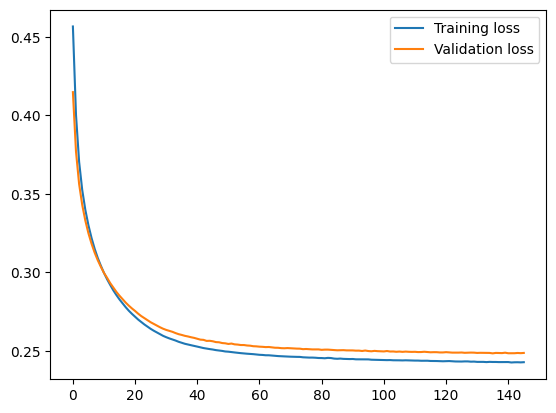

In [29]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

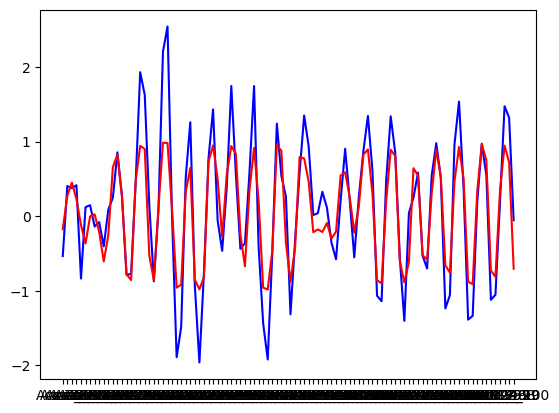

In [30]:
#normal data
#Encoder is bottleneck of 8 Units, decoder is reconstructed output of 100 units
encoder_out = model.encoder(normal_test_data_scaled).numpy()
decoder_out = model.decoder(encoder_out).numpy()
plt.plot(normal_test_data_scaled.iloc[0], 'blue')
plt.plot(decoder_out[0], 'red')

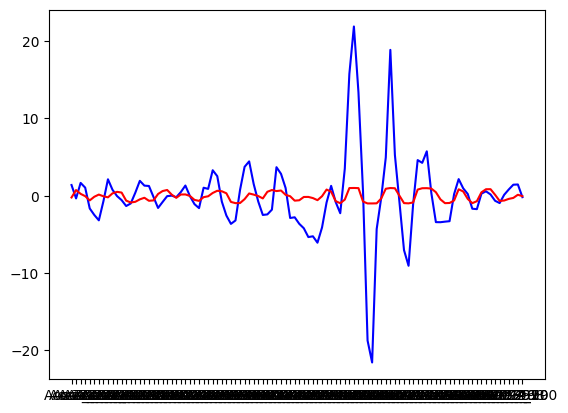

In [31]:
# abnormal data
encoder_out_abnormal = model.encoder(abnormal_test_data_scaled).numpy()
decoder_out_abnormal = model.decoder(encoder_out_abnormal).numpy()
plt.plot(abnormal_test_data_scaled.iloc[2], 'blue')
plt.plot(decoder_out_abnormal[2], 'red')

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(array([286.,  26.,  20.,   4.,   9.,   5.,   3.,  14.,  21.,  55.,  64.,
         63.,  56.,  66.,  63.,  49.,  41.,  36.,  39.,  39.,  32.,  17.,
         24.,  14.,  12.,  10.,   7.,  12.,   6.,   8.,   5.,   2.,   3.,
          1.,   1.,   0.,   1.,   0.,   4.,   1.,   0.,   2.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([0.00229517, 0.02448232, 0.04666946, 0.06885661, 0.09104376,
        0.11323091, 0.13541806, 0.15760522, 0.17979236, 0.2019795 ,
        0.22416666, 0.24635381, 0.26854095, 0.29072809, 0.31291527,
        0.33510241, 0.35728955, 0.3794767 , 0.40166384, 0.42385101,
        0.44603816, 0.4682253 , 0.49041244, 0.51259959, 0.5347867 ,
        0.55697387, 0.57916099, 0.60134816, 0.62353534, 0.64572245,
        0.66790962, 0.69009674, 0.71228391, 0.73447108, 0.7566582 ,
        0.77884537, 0.80103248, 0.82321966, 0.84540683, 0.86759394,
        0.88978112, 0.91196823, 0.9341554 , 0.95634258, 0.97852969,
        1.00071692, 1.02290404, 1.04509115, 1.

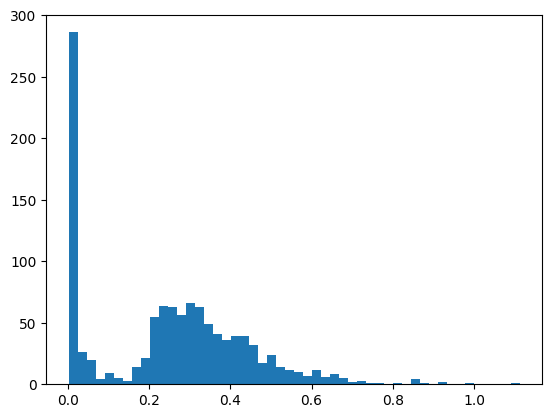

In [32]:
reconstruction_normal = model.predict(normal_test_data_scaled)    #output error between input and output
train_loss = tf.keras.losses.mae(reconstruction_normal, normal_test_data_scaled)
plt.hist(train_loss, bins=50)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


(array([1., 0., 1., 0., 1., 0., 0., 3., 3., 0., 1., 0., 1., 1., 1., 1., 0.,
        1., 1., 1., 0., 1., 1., 0., 1., 3., 0., 1., 0., 2., 1., 2., 1., 1.,
        1., 2., 0., 2., 1., 0., 0., 0., 2., 1., 0., 0., 1., 0., 0., 1.]),
 array([0.69850492, 0.75862473, 0.81874454, 0.87886435, 0.93898416,
        0.9991039 , 1.05922377, 1.11934352, 1.17946339, 1.23958313,
        1.29970288, 1.35982275, 1.41994262, 1.48006237, 1.54018211,
        1.60030198, 1.66042185, 1.7205416 , 1.78066134, 1.84078121,
        1.90090096, 1.96102083, 2.02114058, 2.08126044, 2.14138031,
        2.20149994, 2.26161981, 2.32173967, 2.3818593 , 2.44197941,
        2.50209904, 2.5622189 , 2.62233877, 2.6824584 , 2.74257827,
        2.80269814, 2.86281776, 2.92293763, 2.9830575 , 3.04317737,
        3.103297  , 3.16341686, 3.22353673, 3.2836566 , 3.34377623,
        3.40389609, 3.46401596, 3.52413583, 3.58425546, 3.64437532,
        3.70449519]),
 <BarContainer object of 50 artists>)

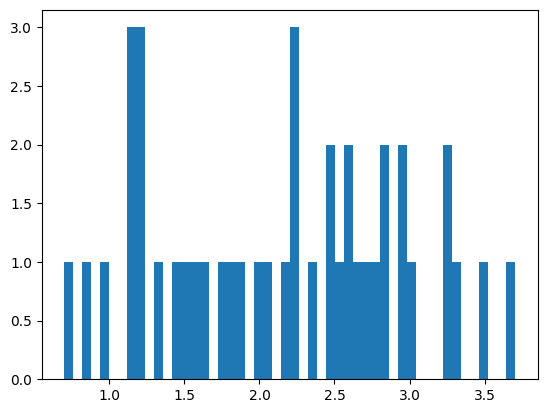

In [33]:
reconstruction_abnormal = model.predict(abnormal_test_data_scaled)
train_loss_abnormal = tf.keras.losses.mae(reconstruction_abnormal, abnormal_test_data_scaled)
plt.hist(train_loss_abnormal, bins=50)

In [35]:
# threshold auswählen nach business logic
threshold = np.mean(train_loss) + 2.5*np.std(train_loss)
threshold

np.float32(0.7404731)

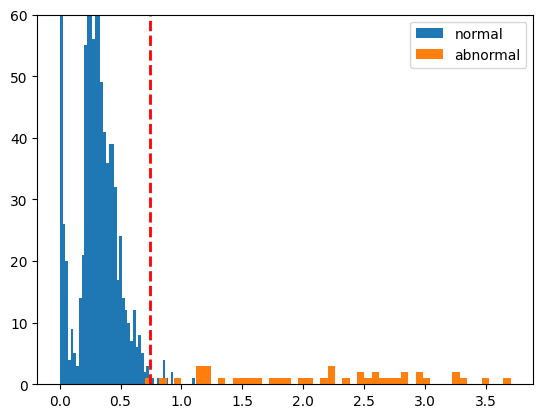

In [36]:

plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_abnormal, bins=50, label='abnormal')
plt.ylim(0, 60)
plt.legend()
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=2,label = '{:0.3f}'.format(threshold))
plt.show()

In [37]:
preds_normal=tf.math.less(train_loss, threshold)
correct = tf.math.count_nonzero(preds_normal)
false_predictions_normal = [i for i, x in enumerate(preds_normal) if not x]
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_normal))
print("False Predictions index: ", false_predictions_normal)

Correct Predictions:  1111
Accuracy:  0.9893143365983972
False Predictions index:  [67, 208, 219, 439, 470, 641, 753, 803, 837, 900, 980, 1009]


In [38]:
preds_abnormal=tf.math.greater(train_loss_abnormal, threshold)
correct = tf.math.count_nonzero(preds_abnormal)
false_predictions_abnormal = [i for i, x in enumerate(preds_abnormal) if not x]
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_abnormal))

Correct Predictions:  41
Accuracy:  0.9761904761904762


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


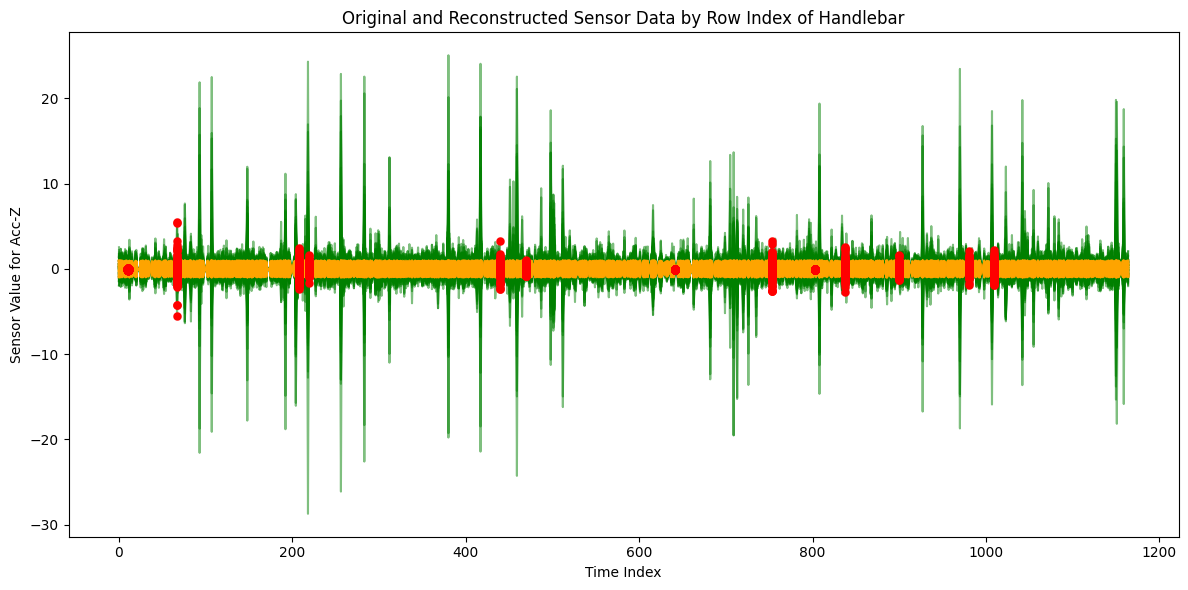

In [40]:
# reconstruct test data using autoencoder

import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your autoencoder model and combined_df ready

# 1. Select columns to plot (e.g., "Acc-Z_1" to "Acc-Z_100")
sensor_cols = [col for col in test_data_scaled_df.columns if col.startswith("Acc-Z_")]

# 2. Extract the sensor data from combined_df
sensor_data = test_data_scaled_df[sensor_cols].values

# 3. Reconstruct the data using the autoencoder
reconstructed_data = model.predict(sensor_data)

# 4. Plot the original and reconstructed data points
plt.figure(figsize=(12, 6))

# Plot original data
for i, col in enumerate(sensor_cols):
    plt.plot(test_data_scaled_df.index, sensor_data[:, i], color='green', alpha=0.5)

# Plot reconstructed data
for i, col in enumerate(sensor_cols):
    plt.plot(test_data_scaled_df.index, reconstructed_data[:, i], color='orange', alpha=0.5)

# Highlight false predictions with a vertical scatter
for row_i in false_predictions_normal:
    y_values = sensor_data[row_i, :] 
    x_values = [test_data_scaled_df.index[row_i]] * len(y_values)
    plt.scatter(x_values, y_values, color='red', alpha=1.0, zorder=3, linewidths=0.1)
for row_i in false_predictions_abnormal:
    y_values = sensor_data[row_i, :] 
    x_values = [test_data_scaled_df.index[row_i]] * len(y_values)
    plt.scatter(x_values, y_values, color='red', alpha=1.0, zorder=3)

plt.title("Original and Reconstructed Sensor Data by Row Index of Handlebar")
plt.xlabel("Time Index")
plt.ylabel("Sensor Value for Acc-Z")
plt.tight_layout()
plt.show()